# Adult Salary

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier as RC, LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Importing Dataset

In [2]:
names = ('age', 
'workclass', 
'fnlwgt', 
'education', 
'education-num', 
'marital-status', 
'occupation', 
'relationship', 
'race', 
'sex', 
'capital-gain', 
'capital-loss', 
'hours-per-week', 
'native-country', 
'income')

In [3]:
df = pd.read_csv('adult-all.csv', names = names)

Exploratory Data Analysis

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.isin(['?']).sum(axis = 0)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [7]:
# Replace question marks with nan
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)

In [8]:
df.isin(['?']).sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
# Dropping out nan rows?
df.dropna(axis = 0, how = 'any', inplace = True)

In [10]:
df.shape

(45222, 15)

In [11]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1}).astype(int)
df['sex'] = df['sex'].map({'Male':0, 'Female':1}).astype(int)
df['race'] = df['race'].map({'Black':0, 'Other':1, 'Asian-Pac-Islander':2, 'White':3, 'Amer-Indian-Eskimo':4}).astype(int)
df['marital-status'] = df['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}
).astype(int)
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}
).astype(int)
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}
).astype(int)
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3,
'Handlers-cleaners': 4, 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,
'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12,
'Other-service': 13,'Protective-serv':14}
).astype(int)
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}
).astype(int)
df['native-country'] = df['native-country'].map({'United-States': 0, 'Cuba': 0, 'Jamaica': 0, 'India': 0, 'Mexico': 0, 
                                                 'South': 0, 'Puerto-Rico': 0, 'Honduras': 0, 'England': 0, 'Canada': 0,
                                                 'Germany': 0, 'Iran': 0, 'Philippines': 0, 'Italy': 0, 'Poland': 0,
                                                 'Columbia': 0, 'Cambodia': 0, 'Thailand': 0, 'Ecuador': 0, 'Laos': 0,
                                                 'Taiwan': 0, 'Haiti': 0, 'Portugal': 0, 'Dominican-Republic': 0, 'El-Salvador': 0, 'France': 0, 'Guatemala': 0, 'China': 0, 'Japan': 0, 'Yugoslavia': 0, 'Peru': 0, 'Outlying-US(Guam-USVI-etc)': 0, 'Scotland': 0, 'Trinadad&Tobago': 0, 'Greece': 0, 'Nicaragua': 0, 'Vietnam': 0, 'Hong': 0, 'Ireland': 0, 'Hungary': 0, 'Holand-Netherlands'
}).astype(int)

In [12]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
count,45222.000000,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,4.567069,1.897347e+05,5.563354,10.118460,3.228296,7.315024,2.807196,2.684711,0.324952,1101.430344,88.595418,40.938017,0.247844
std,13.217870,1.358400,1.056392e+05,4.881108,2.552881,1.439853,3.486367,1.872285,0.900953,0.468362,7506.430084,404.956092,12.007508,0.431766
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,5.000000,1.173882e+05,3.000000,9.000000,2.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,5.000000,1.783160e+05,3.000000,10.000000,2.000000,7.000000,4.000000,3.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,5.000000,2.379260e+05,12.000000,13.000000,5.000000,10.000000,4.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,6.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


<AxesSubplot:>

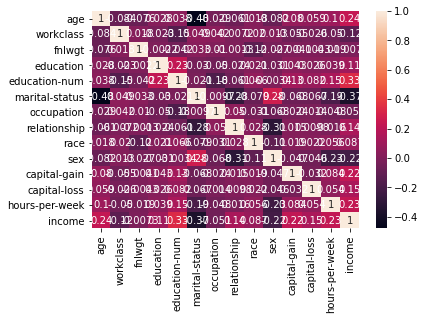

In [13]:
# plt.figsize(10, 9)
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='education'>

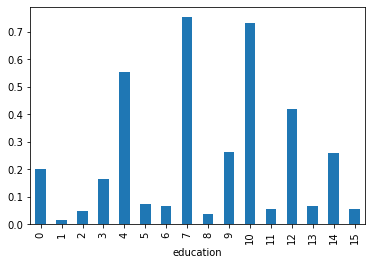

In [14]:
df.groupby('education').income.mean().plot(kind='bar')

Classification

In [15]:
y = df.income
x = df.drop('income', axis =  1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 176)

In [16]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(31655, 14) (13567, 14) (31655,) (13567,)


In [17]:
models = {'Ridge' : make_pipeline(StandardScaler(), RC(random_state=123)),
    'RandomForest' : make_pipeline(StandardScaler(), RFC(random_state=123)),
    'LogisticRegression' : make_pipeline(StandardScaler(), LR(random_state=123)),
    'DecisionTreeClassifier' : make_pipeline(StandardScaler(), DTC(random_state=123)),
    'GradientBoosting' : make_pipeline(StandardScaler(), GBC(random_state=123))}


In [18]:
models

{'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=123))]),
 'LogisticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(random_state=123))]),
 'DecisionTreeClassifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=123))])}

In [19]:
models_fit = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    models_fit[name] = model
    print(f'{name}')

ValueError: could not convert string to float: 'United-States'

In [ ]:
models_fit

In [ ]:
res1 = []
names = []
for name, model in models_fit.items():
    ypred = model.predict(xtest)
    names.append(name)
    r1 = accuracy_score(ytest, ypred)
    res1 = np.append(res1, r1)
    output = "%s|Accuracy = %f" %(name, r1)
    print(output)


In [ ]:
plt.bar(names, res1)
plt.title('Accuracy')
plt.xticks(rotation = 45)

In [ ]:
res1 = np.array(abs(res1))
plt.pie(res1, labels = names)
res1

HyperParameter Tuning

In [ ]:
model = make_pipeline(StandardScaler(), RC(alpha=1.0, fit_intercept=True, normalize='deprecated',
                                        copy_X=True, max_iter=None, tol=0.001, class_weight=None, solver='auto',
                                        random_state=None))

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(f'{accuracy_score(ytest, ypred)}')

More Model(s) With Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RS

In [ ]:
RC_hyperparameters = {
    'alpha' : [0, 0.25, 0.5, 0.75, 1],
    'normalize' : [True, False], 
    'max_iter' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'tol' : [0.001, 0.0001, 0.00001]
}

In [ ]:
model1 = RC()
model1 = RS(model1, RC_hyperparameters, n_iter=50)
model1.fit(xtrain, ytrain)
model1.best_params_
ypred1 = model1.predict(xtest)
print(f'{accuracy_score(ytest, ypred1)}')

In [ ]:
model1.best_params_
print(model1.best_params_)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KN
model3 = KN(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30)
model3.fit(xtrain, ytrain)
ypred = model3.predict(xtest)
print(f'{accuracy_score(ytest, ypred)}')


In [ ]:
KN_hyperparameters = {
    'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights' : ['uniform', 'distance'], 
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [ ]:
model4 = KN()
model4 = RS(model4, KN_hyperparameters, n_iter=50)
model4.fit(xtrain, ytrain)
model4.best_params_
ypred4 = model4.predict(xtest)
print(f'{accuracy_score(ytest, ypred4)}')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(model4, xtest, ytest, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(ytest, ypred4))
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred4)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred4)
# Recall
from sklearn.metrics import recall_score
recall_score(ytest, ypred4, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(ytest, ypred4, average=None)


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred4)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred4)
# Recall
from sklearn.metrics import recall_score
recall_score(ytest, ypred4, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(ytest, ypred4, average=None)


In [ ]:
# Method 1: sklearn
from sklearn.metrics import f1_score
import math
# Method 2: Manual Calculation
tp = 56
tn = 19
fp = 11
fn = 2
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
NPV = tn / (tn + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
F1 = 2 * (precision * recall) / (precision + recall)
balanced_accuracy = (recall + specificity) / 2
MCC = ((tp * tn) - (fp * fn)) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

In [ ]:
def get_confusion_matrix_values(ytest, ypred4):
    cm = confusion_matrix(ytest, ypred4)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

tp, fp, fn, tn = get_confusion_matrix_values(ytest, ypred4)



In [ ]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
NPV = tn / (tn + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
F1 = 2 * (precision * recall) / (precision + recall)
ba= (recall + specificity) / 2
MCC = ((tp * tn) - (fp * fn)) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

In [ ]:
print(precision)
print(recall)
print(specificity)
print(NPV)
print(accuracy)
print(F1)
print(ba)
print(MCC)